# RL tabular MM analysis
Set parameters, optionally run `config` with `--mm-type rl_tabular`, then plot PnL, rewards, actions, inventory, and spread.

In [193]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

# ---- parameters ----
run_simulation = True  # set True to launch a run from the notebook
run_simple_simulation = True  # set True to run simple MM
seed = 123456
ticker = 'AAPL'
historical_date = '20000101'
start_time = '00:00:01'
end_time = '10:00:00'
mm_type = 'rl_tabular'  # use underscore for v2
simple_mm_type = 'simple'
log_name = f'rl_tabular_seed_{seed}'
simple_log_name = f'simple_seed_{seed}'
repo_root = Path('..')
log_dir = repo_root / 'log' / log_name
simple_log_dir = repo_root / 'log' / simple_log_name
# --------------------

print('Log dir:', log_dir.resolve())
print('Simple log dir:', simple_log_dir.resolve())


Log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/rl_tabular_seed_123456
Simple log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/simple_seed_123456


## Run simulation (optional)

In [194]:
if run_simulation:
    cmd = [
        'python', 'main.py',
        '-c', 'config',
        '-t', ticker,
        '-d', historical_date,
        '--start-time', start_time,
        '--end-time', end_time,
        '--seed', str(seed),
        '--log_dir', log_name,
        '--mm-type', mm_type,
    ]
    print('Running RL tabular:', ' '.join(cmd))
    result = subprocess.run(cmd, cwd=repo_root)
    print('Return code:', result.returncode)
else:
    print('Skipping RL simulation; set run_simulation=True to execute.')

if run_simple_simulation:
    cmd_simple = [
        'python', 'main.py',
        '-c', 'config',
        '-t', ticker,
        '-d', historical_date,
        '--start-time', start_time,
        '--end-time', end_time,
        '--seed', str(seed),
        '--log_dir', simple_log_name,
        '--mm-type', simple_mm_type,
    ]
    print('Running simple MM:', ' '.join(cmd_simple))
    result_simple = subprocess.run(cmd_simple, cwd=repo_root)
    print('Return code simple:', result_simple.returncode)
else:
    print('Skipping simple MM run; set run_simple_simulation=True to execute.')


Running RL tabular: python main.py -c config -t AAPL -d 20000101 --start-time 00:00:01 --end-time 10:00:00 --seed 123456 --log_dir rl_tabular_seed_123456 --mm-type rl_tabular
Beginning of the simulation

Simulation Start Time: 2025-12-05 04:16:48.298111
Configuration seed: 123456

[kernel] t=2000-01-01 00:00:00 processed=0 wall_elapsed=0 days 00:00:00.000017
[kernel] t=2000-01-01 05:53:13 processed=100000 wall_elapsed=0 days 00:00:06.575040
Final holdings for Value Agent 1: { AAPL: -105, CASH: 20498198 }.  Marked to market: 9989378
Final holdings for Value Agent 2: { AAPL: 22, CASH: 7795637 }.  Marked to market: 9997485
Final holdings for Value Agent 3: { AAPL: 151, CASH: -5100840 }.  Marked to market: 10011844
Final holdings for Value Agent 4: { AAPL: -6, CASH: 10599692 }.  Marked to market: 9999188
Final holdings for Value Agent 5: { AAPL: -63, CASH: 16297404 }.  Marked to market: 9992112
Final holdings for RL_TABULAR_MARKET_MAKER_AGENT_0: { AAPL: 1, CASH: 9909909 }.  Marked to marke

Processing orderbook log: 100%|██████████| 24840/24840 [00:00<00:00, 28164.29it/s]


[exchange] archive finished for AAPL
[exchange] order book logging duration: 0:00:01.481343
[exchange] order book archival complete
[kernel] queue_elapsed=0 days 00:00:13.137893 messages=172336 rate=13117.5/s
[kernel] simulation ending
Simulation End Time: 2025-12-05 04:17:05.077444
Time taken to run simulation: 0:00:16.779333
Return code: 0
Running simple MM: python main.py -c config -t AAPL -d 20000101 --start-time 00:00:01 --end-time 10:00:00 --seed 123456 --log_dir simple_seed_123456 --mm-type simple
Beginning of the simulation

Simulation Start Time: 2025-12-05 04:17:06.501049
Configuration seed: 123456

[kernel] t=2000-01-01 00:00:00 processed=0 wall_elapsed=0 days 00:00:00.000017
[kernel] t=2000-01-01 05:49:03.959411725 processed=100000 wall_elapsed=0 days 00:00:06.702990
Final holdings for Value Agent 1: { AAPL: 135, CASH: -3497161 }.  Marked to market: 10021469
Final holdings for Value Agent 2: { AAPL: -90, CASH: 19022834 }.  Marked to market: 10010414
Final holdings for Value

Processing orderbook log: 100%|██████████| 27362/27362 [00:00<00:00, 30528.78it/s]


[exchange] archive finished for AAPL
[exchange] order book logging duration: 0:00:01.584878
[exchange] order book archival complete
[kernel] queue_elapsed=0 days 00:00:14.976061 messages=181049 rate=12089.2/s
[kernel] simulation ending
Simulation End Time: 2025-12-05 04:17:25.589976
Time taken to run simulation: 0:00:19.088927
Return code simple: 0


## Load logs

## RL tabular agent log

In [195]:
#rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_*.bz2'))
#if not rl_files:
#    raise FileNotFoundError('No RL_TABULAR_MARKET_MAKER_AGENT logs found')
#rl_log = pd.read_pickle(rl_files[0])
#print('RL log columns:', list(rl_log.columns))
#rl_log.head()

### Simple MM log


In [196]:
#simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
#if simple_files:
#    simple_log = pd.read_pickle(simple_files[0])
#    print('Simple MM log columns:', list(simple_log.columns))
#    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE']
#else:
#    simple_state_rows = pd.DataFrame()
#    print('No simple MM log found')


### MTM comparison (RL vs simple)


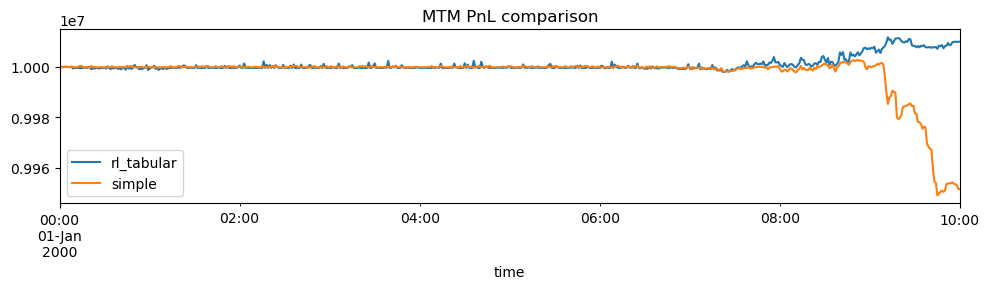

In [197]:
# MTM comparison (aligned on time index)
if 'state_rows' not in globals():
    rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_*.bz2'))
    rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
    state_rows = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()
if 'simple_state_rows' not in globals():
    simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
    simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows.empty:
    rl_state = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if 'simple_state_rows' in globals() and not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

series = []
if rl_state is not None:
    series.append(rl_state['mtm'].rename('rl_tabular'))
if simple_state is not None:
    series.append(simple_state['mtm'].rename('simple'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1T').last()
    title = 'MTM PnL comparison' if len(series) > 1 else 'MTM PnL (RL only)'
    ax = df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')


### Inventory comparison (RL vs simple)


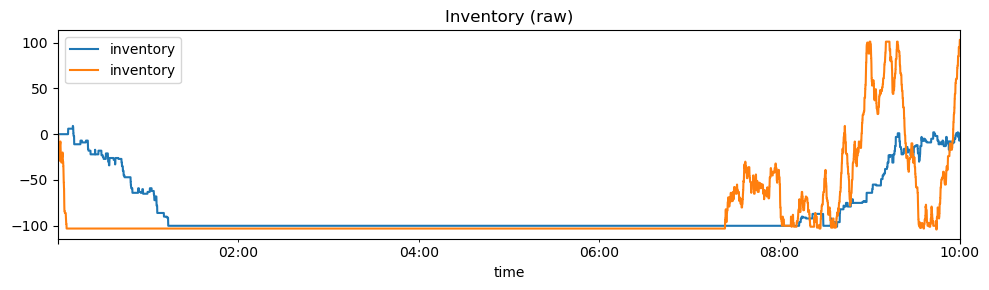

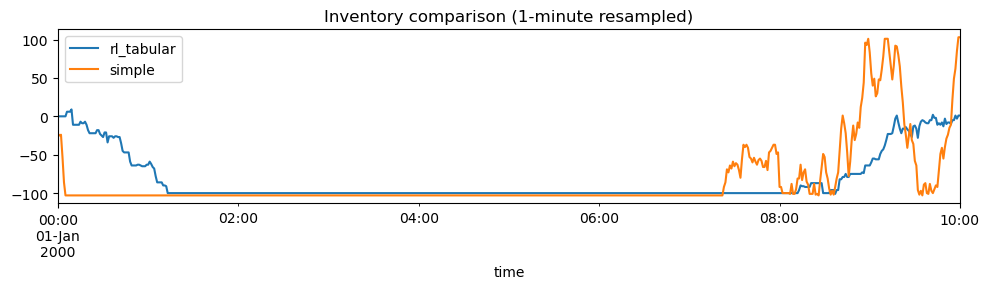

In [198]:
# Plot inventories on common time grid
# Recompute from logs to avoid re-use issues
rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows_rl = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_state_rows = None
if 'simple_log_dir' in globals():
    simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
    simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows_rl.empty:
    rl_state = pd.DataFrame(list(state_rows_rl['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if simple_state_rows is not None and not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

# Plot raw inventories
if rl_state is not None:
    ax = rl_state[['inventory']].plot(figsize=(10,3), title='Inventory (raw)', label='rl_tabular')
    if simple_state is not None:
        simple_state[['inventory']].plot(ax=ax, label='simple')
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')

# Aligned on 1-minute grid
series = []
if rl_state is not None:
    series.append(rl_state['inventory'].rename('rl_tabular'))
if simple_state is not None:
    series.append(simple_state['inventory'].rename('simple'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1T').last()
    title = 'Inventory comparison (1-minute resampled)' if len(series) > 1 else 'Inventory (1-minute resampled, RL only)'
    df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No inventory series available to plot')


### Inventory, cash, MTM, spread, actions

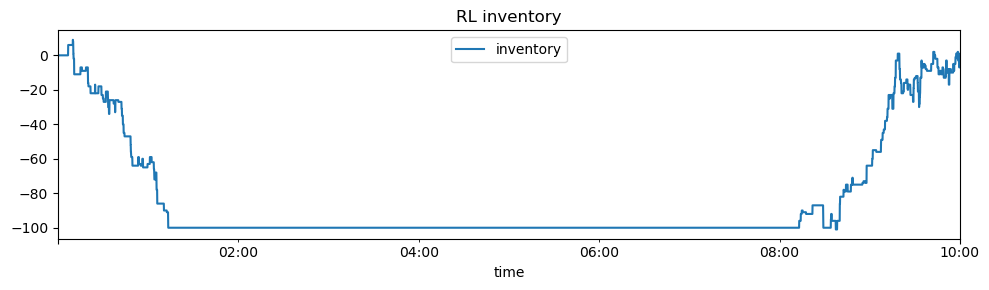

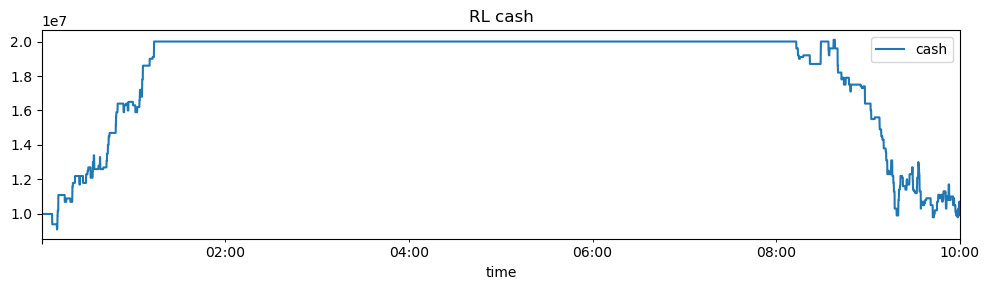

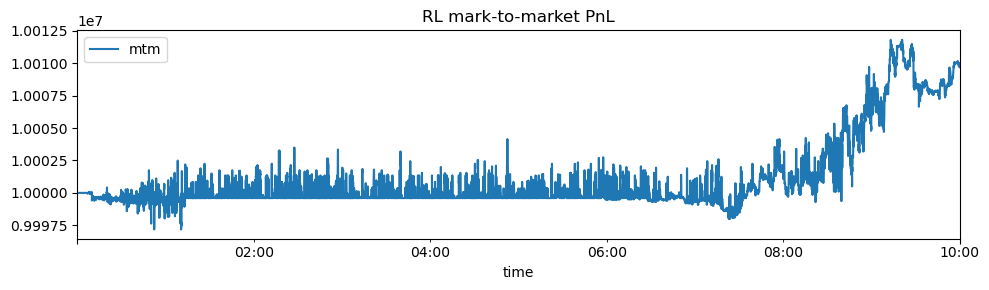

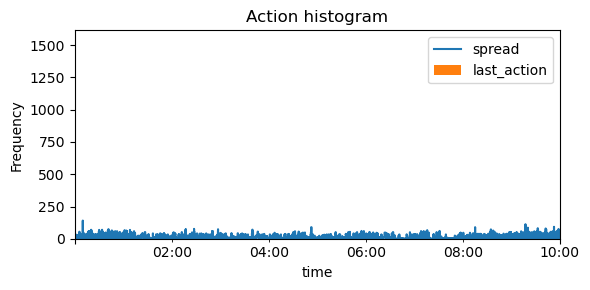

In [199]:
state_rows = rl_log[rl_log['EventType'] == 'STATE']
if not state_rows.empty:
    state_df = pd.DataFrame(list(state_rows['Event']))
    state_df = state_df.set_index('time')
    state_df.index = pd.to_datetime(state_df.index)
    state_df[['inventory']].plot(figsize=(10,3), title='RL inventory', legend=True)
    plt.tight_layout()
    state_df[['cash']].plot(figsize=(10,3), title='RL cash', legend=True)
    plt.tight_layout()
    state_df[['mtm']].plot(figsize=(10,3), title='RL mark-to-market PnL', legend=True)
    plt.tight_layout()
    state_df[['spread']].plot(figsize=(10,3), title='Spread observed by RL', legend=True)
    plt.tight_layout()
    state_df['last_action'].plot(kind='hist', bins=10, figsize=(6,3), title='Action histogram', label='last_action')
    plt.legend()
    plt.tight_layout()
else:
    print('No STATE events found in RL log')

### Spread over time (RL)


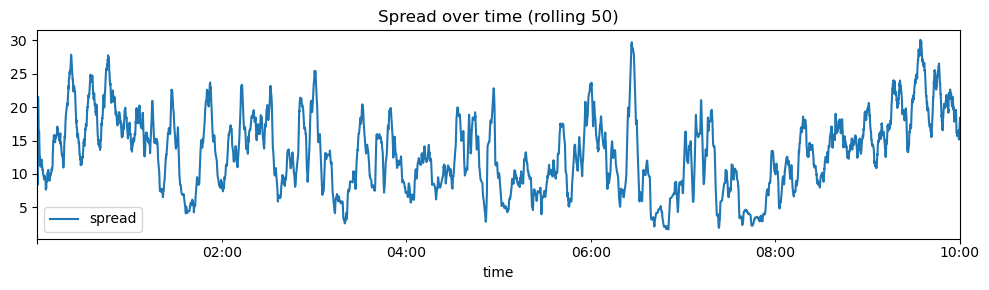

In [200]:
if not state_rows.empty and 'spread' in state_df.columns:
    spread_smoothed = state_df['spread'].rolling(window=100, min_periods=1).mean()
    spread_smoothed.plot(figsize=(10, 3), title='Spread over time (rolling 50)', legend=True)
    plt.tight_layout()
else:
    print('No spread data found in RL STATE events')


### Rewards and PnL per step

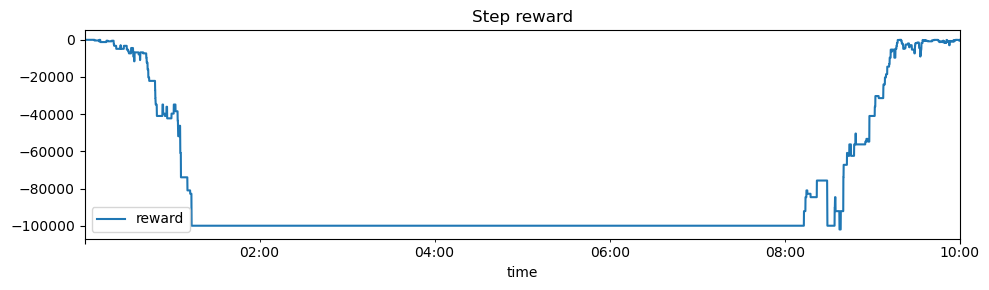

In [201]:
if not state_rows.empty:
    # Plot step reward
    state_df['reward'].plot(figsize=(10,3), title='Step reward', label='reward')
    plt.legend()
    plt.tight_layout()

    # Plot reward rolling mean (100)
    #state_df['reward'].rolling(window=100).mean().plot(figsize=(10,3), title='Reward rolling mean (100)', label='reward_roll100')
    #plt.legend()
    #plt.tight_layout()

    # Plot cumulative reward
    #state_df['cum_reward'].plot(figsize=(10,3), title='Cumulative reward', label='cum_reward')
    #plt.legend()
    #plt.tight_layout()

else:
    print('No STATE events found in RL log')


### Actions over time and Q proxy

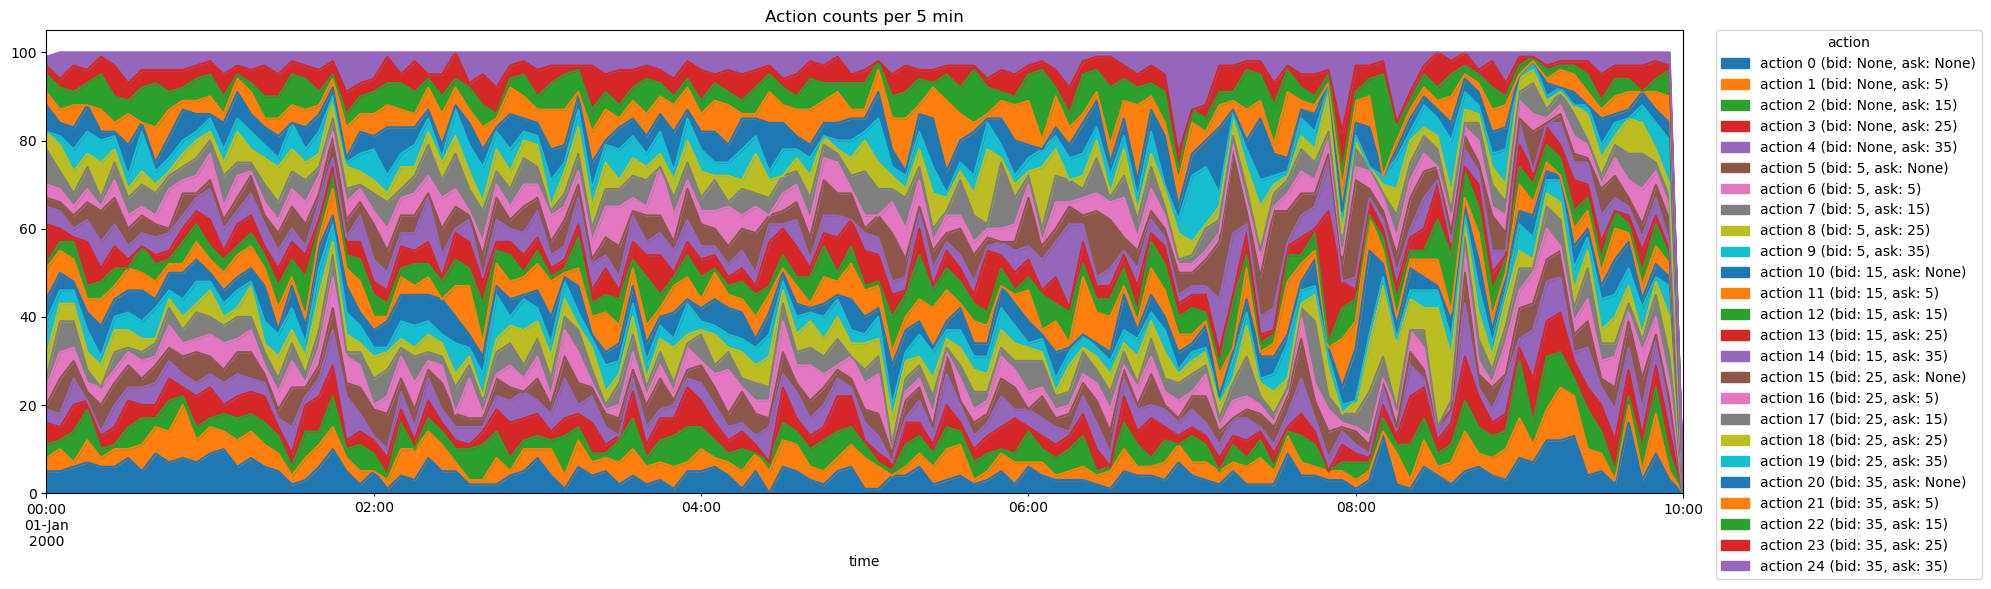

In [202]:
# Build action label map (matches RLTabularMarketMakerAgent order)
offsets = [None, 5, 15, 25, 35]
actions = [(b, a) for b in offsets for a in offsets]  # bid outer, ask inner
action_labels = {i: f"action {i} (bid: {b}, ask: {a})" for i, (b, a) in enumerate(actions)}

# Ensure datetime index
state_df = state_df.copy()
if 'time' in state_df.columns:
    state_df['time'] = pd.to_datetime(state_df['time'])
    state_df = state_df.set_index('time')
state_df = state_df.sort_index()

if not state_df.empty:
    # 5-minute action counts
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )
    # Rename columns to human-readable labels (drop any missing actions)
    action_counts = action_counts.rename(columns=action_labels)

    ax = action_counts.plot.area(figsize=(20, 6), title='Action counts per 5 min')
    ax.legend(title='action', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


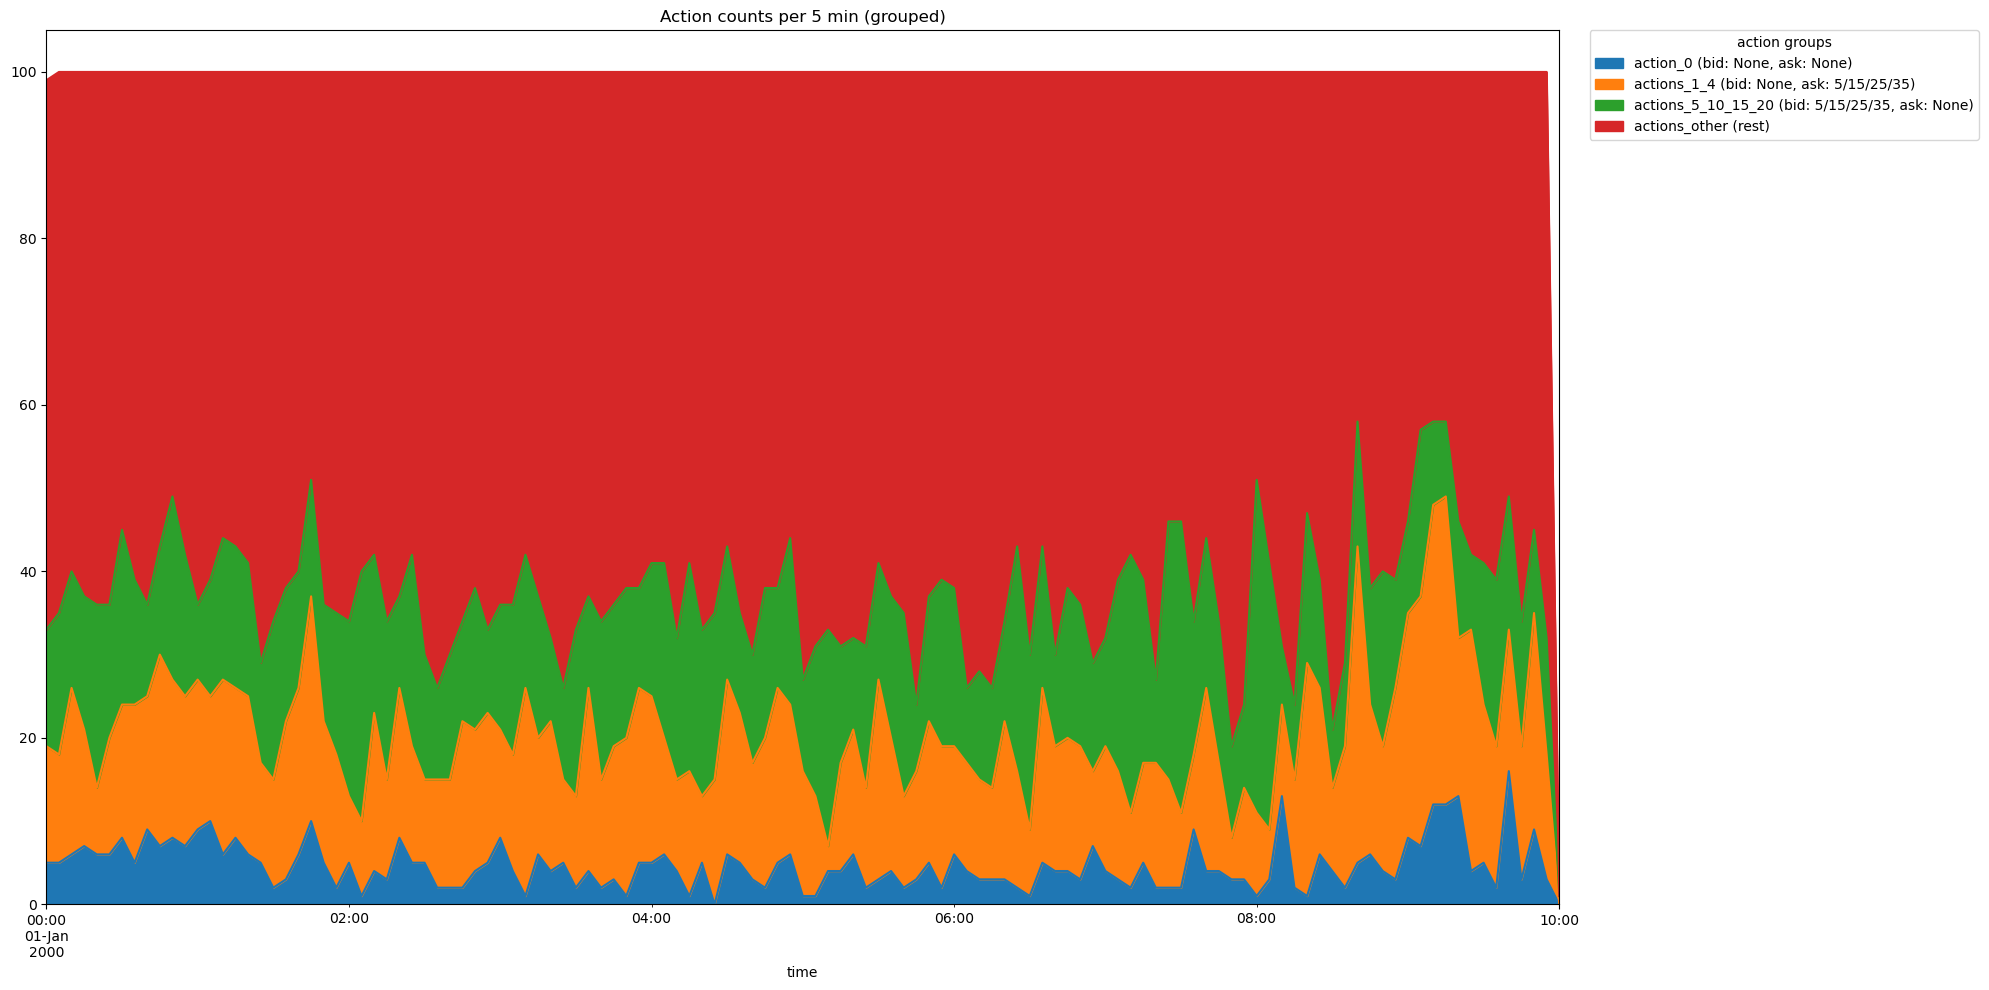

In [203]:
if not state_df.empty:
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )

    def sum_cols(df, cols):
        cols = [c for c in cols if c in df.columns]
        return df[cols].sum(axis=1) if cols else pd.Series(0, index=df.index)

    grouped = pd.DataFrame({
        'action_0 (bid: None, ask: None)': sum_cols(action_counts, [0]),
        'actions_1_4 (bid: None, ask: 5/15/25/35)': sum_cols(action_counts, [1, 2, 3, 4]),
        'actions_5_10_15_20 (bid: 5/15/25/35, ask: None)': sum_cols(action_counts, [5, 10, 15, 20]),
        'actions_other (rest)': sum_cols(
            action_counts,
            [c for c in action_counts.columns if c not in {0, 1, 2, 3, 4, 5, 10, 15, 20}]
        ),
    })

    palette = {
        'action_0 (bid: None, ask: None)': '#1f77b4',
        'actions_1_4 (bid: None, ask: 5/15/25/35)': '#ff7f0e',
        'actions_5_10_15_20 (bid: 5/15/25/35, ask: None)': '#2ca02c',
        'actions_other (rest)': '#d62728',
    }

    ax = grouped.plot.area(
        figsize=(20, 10),
        color=[palette[c] for c in grouped.columns],
        title='Action counts per 5 min (grouped)',
    )
    ax.legend(title='action groups', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


### State visitation heatmap

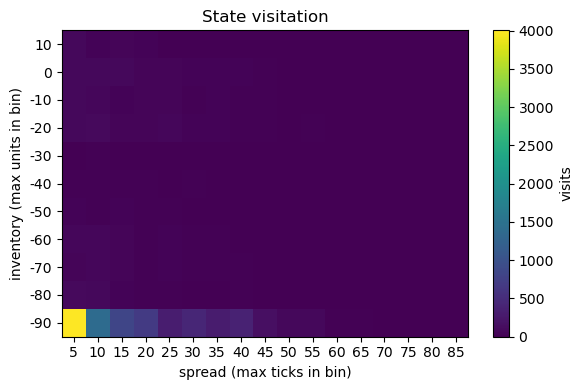

In [204]:
spread_bin_size = 5      # ticks
inventory_bin_size = 10  # shares (or whatever your unit is)

if not state_rows.empty:
    visit = (
        state_df.groupby(['inventory_bin', 'spread_bin'])
                .size()
                .unstack(fill_value=0)
                .sort_index()
    )
    inv_bins = visit.index.values
    spr_bins = visit.columns.values

    spr_labels = [(b + 1) * spread_bin_size for b in spr_bins]          # max spread ticks in bin
    inv_labels = [(b + 1) * inventory_bin_size for b in inv_bins]       # max inventory units in bin

    plt.figure(figsize=(6, 4))
    plt.imshow(
        visit.values,
        origin='lower',
        aspect='auto',
        extent=[spr_bins.min() - 0.5, spr_bins.max() + 0.5,
                inv_bins.min() - 0.5, inv_bins.max() + 0.5],
    )
    plt.colorbar(label='visits')
    plt.xticks(ticks=spr_bins, labels=spr_labels)
    plt.yticks(ticks=inv_bins, labels=inv_labels)
    plt.xlabel('spread (max ticks in bin)')
    plt.ylabel('inventory (max units in bin)')
    plt.title('State visitation')
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


In [205]:
state_df[['inventory', 'inventory_bin']].head()
state_df['inventory_bin'].min(), state_df['inventory_bin'].max()
state_df['inventory_bin'].unique()  # should include negatives


array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10])

## Order book and fundamental

Orderbook columns: [99693, 99712, 99719, 99720, 99721, 99722, 99725, 99726, 99728, 99730, 99731, 99732, 99734, 99736, 99737, 99738, 99739, 99740, 99741, 99742, 99743, 99745, 99746, 99747, 99748, 99750, 99751, 99752, 99753, 99754, 99755, 99756, 99757, 99758, 99759, 99760, 99761, 99762, 99764, 99765, 99766, 99767, 99768, 99769, 99770, 99771, 99772, 99773, 99774, 99775, 99776, 99777, 99779, 99780, 99781, 99782, 99783, 99784, 99785, 99787, 99788, 99789, 99790, 99791, 99792, 99793, 99794, 99795, 99796, 99797, 99798, 99799, 99801, 99802, 99803, 99804, 99805, 99806, 99807, 99808, 99809, 99810, 99811, 99812, 99813, 99814, 99815, 99816, 99817, 99818, 99819, 99820, 99821, 99822, 99823, 99824, 99825, 99826, 99827, 99828, 99829, 99830, 99831, 99832, 99833, 99834, 99835, 99836, 99837, 99838, 99839, 99840, 99841, 99842, 99843, 99844, 99845, 99846, 99847, 99848, 99849, 99851, 99852, 99853, 99854, 99855, 99856, 99857, 99858, 99859, 99860, 99861, 99862, 99863, 99864, 99865, 99866, 99867, 99868, 99869, 

,99693,99712,99719,99720,99721,99722,99725,99726,99728,99730,...,100320,100321,100322,100324,100325,100328,100329,100332,100338,100339
QuoteTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:01.000000008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.000000011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.000000025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.000000059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.000000065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


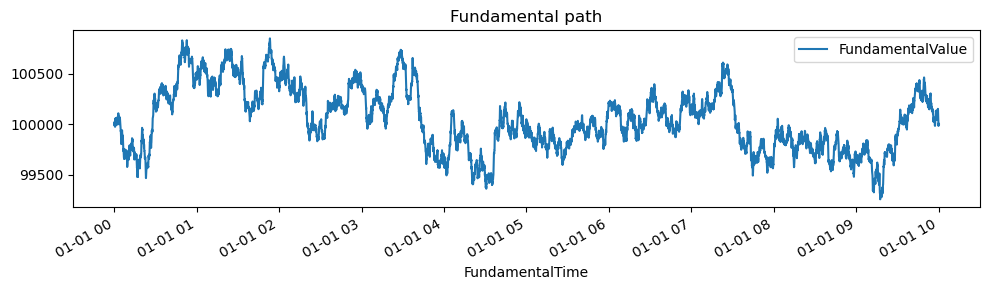

In [206]:
if orderbook_file:
    orderbook = pd.read_pickle(orderbook_file)
    print('Orderbook columns:', list(orderbook.columns))
    def find_col(columns, substrings):
        for col in columns:
            name = ' '.join(col) if isinstance(col, tuple) else str(col)
            lname = name.lower()
            if all(sub in lname for sub in substrings):
                return col
        return None
    bid_price_col = find_col(orderbook.columns, ['best', 'bid']) or find_col(orderbook.columns, ['bid', 'price'])
    ask_price_col = find_col(orderbook.columns, ['best', 'ask']) or find_col(orderbook.columns, ['ask', 'price'])
    if bid_price_col and ask_price_col:
        top = orderbook[[bid_price_col, ask_price_col]].copy()
        top.columns = ['best_bid_price', 'best_ask_price']
        top['mid'] = (top['best_bid_price'] + top['best_ask_price']) / 2
        top['spread'] = top['best_ask_price'] - top['best_bid_price']
        top[['mid']].plot(figsize=(10,3), title='Mid price', legend=True)
        plt.tight_layout()
        top[['spread']].plot(figsize=(10,3), title='Quoted spread', legend=True)
        plt.tight_layout()
    else:
        display(orderbook.head())
else:
    print('Orderbook file not found')

fund_file = next(log_dir.glob('fundamental_*.bz2'), None)
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental.plot(x='FundamentalTime', y='FundamentalValue', legend=True, figsize=(10,3), title='Fundamental path')
    plt.tight_layout()
else:
    print('Fundamental file not found')

### Q-values over time


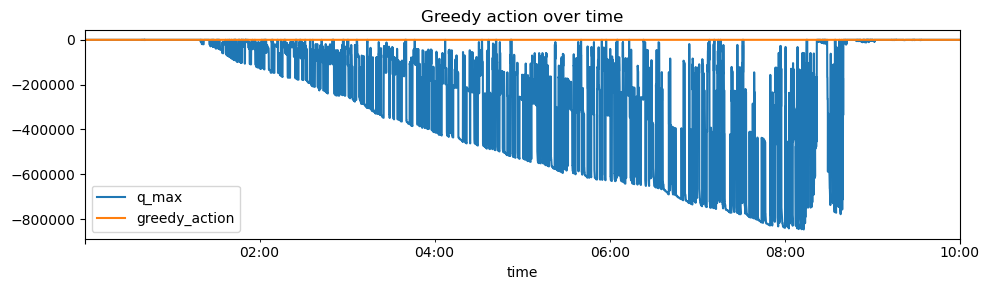

In [207]:
if not state_rows.empty and 'q_max' in state_df.columns:
    state_df['q_max'].plot(figsize=(10,3), title='Max Q for current state', label='q_max')
    plt.legend()
    plt.tight_layout()
    if 'greedy_action' in state_df.columns:
        state_df['greedy_action'].plot(figsize=(10,3), title='Greedy action over time', label='greedy_action')
        plt.legend()
        plt.tight_layout()
else:
    print('No Q info in STATE events')
